In [3]:
import os
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
import librosa

In [6]:
path = "/home/ravikumar/Downloads/Hackathon/ENSV-all/ENSV001.mp3"

In [8]:
samples,sampling_rate = librosa.load(path,sr=None,mono=None,offset=0.0,duration=None)

In [9]:
len(samples),sampling_rate

(5438111, 32000)

In [10]:
duration = len(samples)/sampling_rate
print(duration)

169.94096875


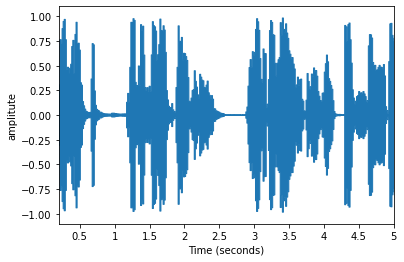

In [19]:
from librosa import display
plt.figure()
display.waveshow(y=samples,sr=sampling_rate)
plt.xlabel("Time (seconds)")
plt.ylabel("amplitute")
plt.xlim([0.20,5.0])
plt.show()

In [5]:
import transformers
from datasets import load_dataset

In [12]:
books = load_dataset("opus_books","en-fr")

Reusing dataset opus_books (/home/ravikumar/.cache/huggingface/datasets/opus_books/en-fr/1.0.0/e8f950a4f32dc39b7f9088908216cd2d7e21ac35f893d04d39eb594746af2daf)
100%|██████████| 1/1 [00:00<00:00, 169.64it/s]


In [13]:
books = books["train"].train_test_split(test_size=0.2)

In [20]:
books["train"][15]

{'id': '14130',
 'translation': {'en': '"Quite well," he enunciated; and, with a bow, he left the gate. She went one way; he another.',
  'fr': "«Très bien,» répondit-il, et, après s'être incliné, il s'éloigna."}}

In [23]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [24]:
source_lang = "en"
target_lang = "fr"
prefix = "translate English to French: "


def preprocess_function(examples):
    inputs = [prefix + example[source_lang] for example in examples["translation"]]
    targets = [example[target_lang] for example in examples["translation"]]
    model_inputs = tokenizer(inputs, max_length=128, truncation=True)

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=128, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [25]:
tokenized_books = books.map(preprocess_function, batched=True)

100%|██████████| 26/26 [00:05<00:00,  4.67ba/s]


In [26]:
tokenized_books

DatasetDict({
    train: Dataset({
        features: ['id', 'translation', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 101668
    })
    test: Dataset({
        features: ['id', 'translation', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 25417
    })
})

In [31]:
!pip3 install torch

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
You should consider upgrading via the '/home/ravikumar/Downloads/Hackathon/env_subdub/bin/python3 -m pip install --upgrade pip' command.


In [32]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer

model = AutoModelForSeq2SeqLM.from_pretrained("bert-base-uncased")

ImportError: 
AutoModelForSeq2SeqLM requires the PyTorch library but it was not found in your environment. Checkout the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.


In [33]:
from transformers import AutoTokenizer,TFAutoModelForSequenceClassification, TFAutoModelForSeq2SeqLM

In [34]:
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-fr")

ValueError: Connection error, and we cannot find the requested files in the cached path. Please try again or make sure your Internet connection is on.

In [37]:
!pip3 install -q tensorflow upgrade

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade
You should consider upgrading via the '/home/ravikumar/Downloads/Hackathon/env_subdub/bin/python3 -m pip install --upgrade pip' command.


In [35]:
from transformers import pipeline

In [36]:
model_checkpoint = "Helsinki-NLP/opus-mt-en-fr"
translator = pipeline("translation", model=model_checkpoint)

Downloading: 100%|██████████| 1.26k/1.26k [00:00<00:00, 747kB/s]


RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

In [ ]:
translator